In [1]:
''' Module 3 - Case Study

__author__ Parikshit Prasai
__email__ letters.prasai@gmail.com
'''

import pandas as pd

# because of an annoying encoding error
# i had to save the companies file as .csv file

company = pd.read_csv('companies.csv', sep = '\t')
rounds2 = pd.read_csv('rounds2.csv', encoding='unicode_escape')

In [2]:
# find null values that might affect the rest of our code.
company.isna().any()

permalink        False
name              True
homepage_url      True
category_list     True
status           False
country_code      True
state_code        True
region            True
city              True
founded_at        True
dtype: bool

In [3]:
company['permalink'] = company['permalink'].str.lower()
company.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/organization/kinestica,Peach,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [4]:
# unique companies present in rounds2

rounds2.company_permalink.describe()

count                       114949
unique                       90247
top       /ORGANIZATION/SOLARFLARE
freq                            10
Name: company_permalink, dtype: object

In [5]:
rounds2.isnull().any()

company_permalink          False
funding_round_permalink    False
funding_round_type         False
funding_round_code          True
funded_at                  False
raised_amount_usd           True
dtype: bool

In [6]:
# lets perform a test to see of there are duplicates in lowercase
# SPOILER ALERT: There are!!

rounds2.loc[rounds2['company_permalink'].isin([
    '/ORGANIZATION/SOLARFLARE', '/ORGANIZATION/SOLARFLARE'.lower()
])].head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
92195,/ORGANIZATION/SOLARFLARE,/funding-round/3453df52533d164e3c4c734c620d9163,venture,NaN,18-06-2008,26000000.0
92196,/organization/solarflare,/funding-round/4f43455f5f0089b5fbd2ea7d4fd8c41e,debt_financing,NaN,21-10-2010,5000000.0
92197,/ORGANIZATION/SOLARFLARE,/funding-round/6e71417aac2efce700d7a0c1a1b93312,venture,NaN,06-04-2014,40000.0
92198,/organization/solarflare,/funding-round/703e25f12c8e10029b3dda9524bf801f,debt_financing,NaN,12-11-2013,5000000.0
92199,/ORGANIZATION/SOLARFLARE,/funding-round/72ece469a2495114cf91adc7f7aa94ac,venture,NaN,02-01-2013,22022208.0


In [7]:
# we will now convert all permalinks to lowercase
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [8]:
# number of unique companies in rounds2
rounds2.company_permalink.describe()

count                       114949
unique                       66370
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

In [9]:
# creating a master table by joining these 2 df
master_frame = pd.merge(
    rounds2, 
    company, 
    how = 'inner', 
    left_on = 'company_permalink', 
    right_on = 'permalink'
)

master_frame.company_permalink.describe()

count                       114875
unique                       66300
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

In [10]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [11]:
print(master_frame.isnull().any())

company_permalink          False
funding_round_permalink    False
funding_round_type         False
funding_round_code          True
funded_at                  False
raised_amount_usd           True
permalink                  False
name                        True
homepage_url                True
category_list               True
status                     False
country_code                True
state_code                  True
region                      True
city                        True
founded_at                  True
dtype: bool


In [12]:
# since there are some NaN fields in raised_amount_usd
# and country code, we need to take care of them

na_on_raised_amt = master_frame.raised_amount_usd.isna().sum()
na_on_country_code = master_frame.country_code.isna().sum()
print(na_on_raised_amt, na_on_country_code)
print(na_on_raised_amt / len(master_frame) * 100, na_on_country_code / len(master_frame) * 100)

19960 8637
17.375408052230686 7.5186071817192595


In [13]:
# a little over 8.6K rows have missing country information
# we will start by removing these rows first
master_frame_with_dropped_na = master_frame.dropna(subset = ['country_code'])
print(master_frame_with_dropped_na.country_code.isna().sum())
print(100 - (len(master_frame_with_dropped_na) / len(master_frame) * 100), '%')
print(len(master_frame) - len(master_frame_with_dropped_na))

0
7.518607181719261 %
8637


In [14]:
# we got rid of rows with missing country information
# we lost little over 7.5% of rows with this operation
# now we can group our data based on country, and funding_type
# get the mean of the group and fill NaNs in our df accordingly

master_frame_grouped = master_frame_with_dropped_na.groupby(['country_code', 'funding_round_type'])

print('before imputation:', master_frame_with_dropped_na.raised_amount_usd.isna().sum())
master_frame_with_dropped_na.raised_amount_usd = master_frame_grouped['raised_amount_usd'].apply(
    lambda x: x.fillna(x.mean())
)
print('after imputation:', master_frame_with_dropped_na.raised_amount_usd.isna().sum())

# now we will remove the rest of the NaN on raised_amount_usd
master_frame_with_dropped_na.dropna(subset = ['raised_amount_usd'], inplace = True)
print('finally:', master_frame_with_dropped_na.raised_amount_usd.isna().sum())

before imputation: 17153
after imputation: 136
finally: 0


E:\Anaconda\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [15]:
print(
    'data loss while dealing with NaNs on country_code and raised_amount_usd:', 
    len(master_frame) - len(master_frame_with_dropped_na),
    '\nQuite reasonable, i think.'
)

print(master_frame.shape, master_frame_with_dropped_na.shape)

data loss while dealing with NaNs on country_code and raised_amount_usd: 8773 
Quite reasonable, i think.
(114875, 16) (106102, 16)


In [16]:
master_frame = master_frame_with_dropped_na

In [17]:
master_frame.funding_round_type.unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

In [18]:
venture_type = master_frame.loc[master_frame['funding_round_type'] == 'venture']
'${:,.2f}'.format(venture_type.raised_amount_usd.mean())

'$11,836,588.76'

In [19]:
angel_type = master_frame.loc[master_frame['funding_round_type'] == 'angel']
'${:,.2f}'.format(angel_type.raised_amount_usd.mean())

'$960,454.43'

In [20]:
seed_type = master_frame.loc[master_frame['funding_round_type'] == 'seed']
'${:,.2f}'.format(seed_type.raised_amount_usd.mean())

'$754,980.47'

In [21]:
private_equity_type = master_frame.loc[master_frame['funding_round_type'] == 'private_equity']
'${:,.2f}'.format(private_equity_type.raised_amount_usd.mean())

'$72,772,779.15'

In [22]:
# aggregation by countries
master_frame.country_code.unique()

array(['IND', 'USA', 'CHN', 'HKG', 'CAN', 'CHL', 'GBR', 'FRA', 'AUS',
       'DNK', 'ROM', 'AUT', 'KOR', 'NLD', 'SWE', 'JPN', 'RUS', 'SGP',
       'NOR', 'COL', 'ESP', 'BEL', 'IRL', 'ITA', 'ISR', 'NZL', 'CZE',
       'DEU', 'CHE', 'BRA', 'BGR', 'SVN', 'JOR', 'HUN', 'BWA', 'NGA',
       'FIN', 'TUR', 'IDN', 'ARE', 'CYP', 'POL', 'CRI', 'PRT', 'ARG',
       'TWN', 'THA', 'SVK', 'UKR', 'LTU', 'ISL', 'ZAF', 'MEX', 'VEN',
       'URY', 'MUS', 'KEN', 'PHL', 'MNE', 'VNM', 'GHA', 'MYS', 'PER',
       'EGY', 'PAN', 'LVA', 'GGY', 'ALB', 'UGA', 'HRV', 'EST', 'LBN',
       'GRC', 'PAK', 'NPL', 'LUX', 'SAU', 'IRN', 'GTM', 'BAH', 'ARM',
       'BGD', 'MDA', 'SRB', 'TUN', 'ZWE', 'BRB', 'NIC', 'TAN', 'PRI',
       'TTO', 'BHR', 'CMR', 'BLR', 'CYM', 'ECU', 'SLV', 'MLT', 'ZMB',
       'MKD', 'GIB', 'TGO', 'BMU', 'HND', 'MCO', 'MMR', 'KAZ', 'QAT',
       'MAR', 'LIE', 'GEO', 'DOM', 'DZA', 'JAM', 'KNA', 'AZE', 'SEN',
       'RWA', 'DMA', 'UZB', 'BLZ', 'OMN', 'PSE', 'KWT', 'KHM', 'CIV',
       'BLM', 'GRD',

In [23]:
top9 = master_frame.groupby(
    'country_code'
).agg(
    'sum'
).sort_values(
    by = 'raised_amount_usd',
    ascending = False
)[:9]

top9

,raised_amount_usd
country_code,
USA,7.452036e+11
CHN,1.035427e+11
GBR,3.837966e+10
IND,3.659327e+10
CAN,2.092862e+10
DEU,1.516877e+10
RUS,1.240905e+10
ISR,1.110380e+10
FRA,9.922925e+09


In [24]:
# sector analysis
mapping = pd.read_csv('mapping.csv')

def categorize(category_str):
    return str(category_str).split('|')[0].strip()

master_frame['category'] = master_frame.category_list.apply(categorize)

mapping['cat'] = (mapping.iloc[:, 1:] == 1).idxmax(1)

maps = pd.DataFrame()
maps['sub-cat'] = mapping.category_list
maps['main_sector'] = mapping.cat
        
master_frame = master_frame.merge(
    maps,
    left_on = 'category',
    right_on = 'sub-cat'
)

In [25]:
# USA based companies' dataframe

D1 = master_frame.loc[
    (master_frame['country_code'] == 'USA') &
    (
        (master_frame['funding_round_type'] == 'venture') |
        (master_frame['funding_round_type'] == 'seed') |
        (master_frame['funding_round_type'] == 'angle') |
        (master_frame['funding_round_type'] == 'private_equity')
    ) &
    (master_frame['raised_amount_usd'] <= 15000000) &
    (master_frame['raised_amount_usd'] >= 5000000)
]

# GRB based companies' dataframe

D2 = master_frame.loc[
    (master_frame['country_code'] == 'GBR') &
    (
        (master_frame['funding_round_type'] == 'venture') |
        (master_frame['funding_round_type'] == 'seed') |
        (master_frame['funding_round_type'] == 'angle') |
        (master_frame['funding_round_type'] == 'private_equity')
    ) &
    (master_frame['raised_amount_usd'] <= 15000000) &
    (master_frame['raised_amount_usd'] >= 5000000)
]

# IND based companies' dataframe

D3 = master_frame.loc[
    (master_frame['country_code'] == 'IND') &
    (
        (master_frame['funding_round_type'] == 'venture') |
        (master_frame['funding_round_type'] == 'seed') |
        (master_frame['funding_round_type'] == 'angle') |
        (master_frame['funding_round_type'] == 'private_equity')
    ) &
    (master_frame['raised_amount_usd'] <= 15000000) &
    (master_frame['raised_amount_usd'] >= 5000000)
]

In [26]:
D1_count_of_investment_by_sectors = D1.groupby('main_sector').agg('count').company_permalink
D1_amount_of_investment_by_sectors = D1.groupby('main_sector').agg('sum')

D2_count_of_investment_by_sectors = D2.groupby('main_sector').agg('count').company_permalink
D2_amount_of_investment_by_sectors = D2.groupby('main_sector').agg('sum')

D3_count_of_investment_by_sectors = D3.groupby('main_sector').agg('count').company_permalink
D3_amount_of_investment_by_sectors = D3.groupby('main_sector').agg('sum')

import numpy as np

D1['count_by_sector'] = np.where(
    D1['main_sector'] != None, 
    D1_count_of_investment_by_sectors[D1['main_sector']], 
    None
)

D1['amount_by_sector'] = np.where(
    D1['main_sector'] != None, 
    D1_amount_of_investment_by_sectors.loc[D1['main_sector']].raised_amount_usd, 
    None
)


D2['count_by_sector'] = np.where(
    D2['main_sector'] != None, 
    D2_count_of_investment_by_sectors[D2['main_sector']], 
    None
)

D2['amount_by_sector'] = np.where(
    D2['main_sector'] != None, 
    D2_amount_of_investment_by_sectors.loc[D2['main_sector']].raised_amount_usd, 
    None
)


D3['count_by_sector'] = np.where(
    D3['main_sector'] != None, 
    D3_count_of_investment_by_sectors[D3['main_sector']], 
    None
)

D3['amount_by_sector'] = np.where(
    D3['main_sector'] != None, 
    D3_amount_of_investment_by_sectors.loc[D3['main_sector']].raised_amount_usd, 
    None
)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

In [27]:
print(
    'total number of investments D1',
    D1_count_of_investment_by_sectors.agg('sum'),
    'total amount of investments D1',
    '${:,.2f}'.format(float(D1_amount_of_investment_by_sectors.agg('sum')))
)

print(
    'total number of investments D2',
    D2_count_of_investment_by_sectors.agg('sum'),
    'total amount of investments D2',
    '${:,.2f}'.format(float(D2_amount_of_investment_by_sectors.agg('sum')))
)

print(
    'total number of investments D3',
    D3_count_of_investment_by_sectors.agg('sum'),
    'total amount of investments D3',
    '${:,.2f}'.format(float(D3_amount_of_investment_by_sectors.agg('sum')))
)

print(D1_count_of_investment_by_sectors.sort_values(ascending = False))
print(D2_count_of_investment_by_sectors.sort_values(ascending = False))
print(D3_count_of_investment_by_sectors.sort_values(ascending = False))

total number of investments D1 13436 total amount of investments D1 $125,134,027,240.66
total number of investments D2 810 total amount of investments D2 $7,277,781,356.37
total number of investments D3 308 total amount of investments D3 $2,754,637,552.00
main_sector
Others                                     3459
Cleantech / Semiconductors                 2670
Social, Finance, Analytics, Advertising    2367
News, Search and Messaging                 1870
Health                                     1095
Manufacturing                              1012
Entertainment                               726
Automotive & Sports                         237
Name: company_permalink, dtype: int64
main_sector
Others                                     213
Cleantech / Semiconductors                 153
Social, Finance, Analytics, Advertising    144
News, Search and Messaging                 105
Entertainment                               79
Manufacturing                               55
Health          

In [28]:
usa_grouping = (master_frame[
    master_frame['country_code'] == 'USA'
])

usa_grouping = (usa_grouping[
    usa_grouping['main_sector'] == 'Others'
])

usa_grouping.groupby(
    [
        'permalink',
        'name'
    ]
).agg(
    'sum'
).sort_values(
    by = 'raised_amount_usd',
    ascending = False
).head()

,,raised_amount_usd
permalink,name,
/organization/facebook,Facebook,2.425700e+09
/organization/zebra-technologies,Zebra Technologies,2.000000e+09
/organization/quad-graphics,Quad/Graphics,1.900000e+09
/organization/social-finance,SoFi,1.766200e+09
/organization/venari-resources,Venari Resources,1.498515e+09


In [29]:
usa_grouping = (master_frame[
    master_frame['country_code'] == 'USA'
])

usa_grouping = (usa_grouping[
    usa_grouping['main_sector'] == 'Cleantech / Semiconductors'
])

usa_grouping.groupby(
    [
        'permalink',
        'name'
    ]
).agg(
    'sum'
).sort_values(
    by = 'raised_amount_usd',
    ascending = False
).head()

,,raised_amount_usd
permalink,name,
/organization/freescale,Freescale Semiconductor,1.760000e+10
/organization/carestream-health,Carestream,2.400000e+09
/organization/solarcity,SolarCity,1.250625e+09
/organization/cape-wind,Cape Wind,1.200000e+09
/organization/terra-gen-power,Terra-Gen Power,1.200000e+09


In [30]:
usa_grouping = (master_frame[
    master_frame['country_code'] == 'GBR'
])

usa_grouping = (usa_grouping[
    usa_grouping['main_sector'] == 'Cleantech / Semiconductors'
])

usa_grouping.groupby(
    [
        'permalink',
        'name'
    ]
).agg(
    'sum'
).sort_values(
    by = 'raised_amount_usd',
    ascending = False
).head()

,,raised_amount_usd
permalink,name,
/organization/vertex-pharmaceuticals,Vertex Pharmaceuticals,600397225.0
/organization/immunocore,Immunocore,320000000.0
/organization/gw-pharmaceuticals,GW Pharmaceuticals,179200000.0
/organization/intelligent-energy,Intelligent Energy,166570000.0
/organization/reneuron-group,ReNeuron Group,162784127.0


In [31]:
usa_grouping = (master_frame[
    master_frame['country_code'] == 'IND'
])

usa_grouping = (usa_grouping[
    usa_grouping['main_sector'] == 'Others'
])

usa_grouping.groupby(
    [
        'permalink',
        'name'
    ]
).agg(
    'sum'
).sort_values(
    by = 'raised_amount_usd',
    ascending = False
).head()

,,raised_amount_usd
permalink,name,
/organization/flipkart,Flipkart,3.151140e+09
/organization/snapdeal,Snapdeal,1.932632e+09
/organization/paytm,Paytm,7.000000e+08
/organization/piramal-realty,Piramal Realty,4.340000e+08
/organization/tata-teleservices,Tata Teleservices,2.120000e+08


In [32]:
usa_grouping = (master_frame[
    master_frame['country_code'] == 'IND'
])

usa_grouping = (usa_grouping[
    usa_grouping['main_sector'] == 'News, Search and Messaging'
])

usa_grouping.groupby(
    [
        'permalink',
        'name'
    ]
).agg(
    'sum'
).sort_values(
    by = 'raised_amount_usd',
    ascending = False
).head()

,,raised_amount_usd
permalink,name,
/organization/one97-communications,One97 Communications,6.519412e+08
/organization/act-atria-convergence-technologies-pvt-ltd-,ACT (Atria Convergence Technologies Pvt. Ltd.),5.000000e+08
/organization/quikr-india,Quikr,3.460000e+08
/organization/tower-vision,Tower Vision,3.000000e+08
/organization/zipdial,Zipdial,1.513483e+08


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

'''
task: A plot showing the fraction of total investments (globally) in venture, seed, and private 
equity, and the average amount of investment in each funding type. This chart should make it clear 
that a certain funding type (FT) is best suited for Spark Funds.
'''

# lets start by filtering our master_frame to contain only relevant, aggregated data

filtered_data = master_frame[['funding_round_type', 'country_code', 'raised_amount_usd']]
filtered_data = filtered_data.loc[
    (
        (filtered_data['funding_round_type'] == 'seed') |
        (filtered_data['funding_round_type'] == 'angel') |
        (filtered_data['funding_round_type'] == 'venture') |
        (filtered_data['funding_round_type'] == 'private_equity')
    )
]

filtrd_group = filtered_data.groupby('funding_round_type')['raised_amount_usd'].agg(['sum', 'count'])
filtrd_group.reset_index(inplace = True)
filtrd_group.index = filtrd_group['funding_round_type']

plot1_a = filtrd_group.plot(
    kind = 'pie',
    y = 'sum',
    legend = False, # because I will implement custom legends later
    autopct = '%1.2f%%',
    figsize = (10,10),
    title = 'Distribution of investment amount across FT\'s globally\n'+
    'The total amount is: ' + '${:,.2f}'.format(filtrd_group['sum'].sum())
).get_figure()

# I want my legends to contain values as well
# hence all this mess
plot1_a.legend([
    'Angel - '+ 
    '${:,.2f}'.format(filtrd_group.loc[
        filtrd_group['funding_round_type'] == 'angel'
    ]['sum'].values[0]),
    'Private Equity - '+ 
    '${:,.2f}'.format(filtrd_group.loc[
        filtrd_group['funding_round_type'] == 'private_equity'
    ]['sum'].values[0]), 
    'Seed - '+ 
    '${:,.2f}'.format(filtrd_group.loc[
        filtrd_group['funding_round_type'] == 'seed'
    ]['sum'].values[0]), 
    'Venture - '+ 
    '${:,.2f}'.format(filtrd_group.loc[
        filtrd_group['funding_round_type'] == 'venture'
    ]['sum'].values[0])
], loc = 3)

plot1_b = filtrd_group.plot(
    kind = 'pie',
    y = 'count',
    legend = False,
    autopct = '%1.2f%%',
    figsize = (10,10),
    title = 'Distribution of number of investments across FT\'s globally\n'+
    'The total count is: ' + '{:,.2f}'.format(filtrd_group['count'].sum())
).get_figure()

plot1_b.legend([
    'Angel - '+ 
    '{:,.0f}'.format(filtrd_group.loc[
        filtrd_group['funding_round_type'] == 'angel'
    ]['count'].values[0]),
    'Private Equity - '+ 
    '{:,.0f}'.format(filtrd_group.loc[
        filtrd_group['funding_round_type'] == 'private_equity'
    ]['count'].values[0]), 
    'Seed - '+ 
    '{:,.0f}'.format(filtrd_group.loc[
        filtrd_group['funding_round_type'] == 'seed'
    ]['count'].values[0]), 
    'Venture - '+ 
    '{:,.0f}'.format(filtrd_group.loc[
        filtrd_group['funding_round_type'] == 'venture'
    ]['count'].values[0])
], loc = 3)

# let's save the image to reuse in ppt presentation
plot1_a.savefig('dist_amt_global.jpg')
plot1_b.savefig('dist_cnt_global.jpg')

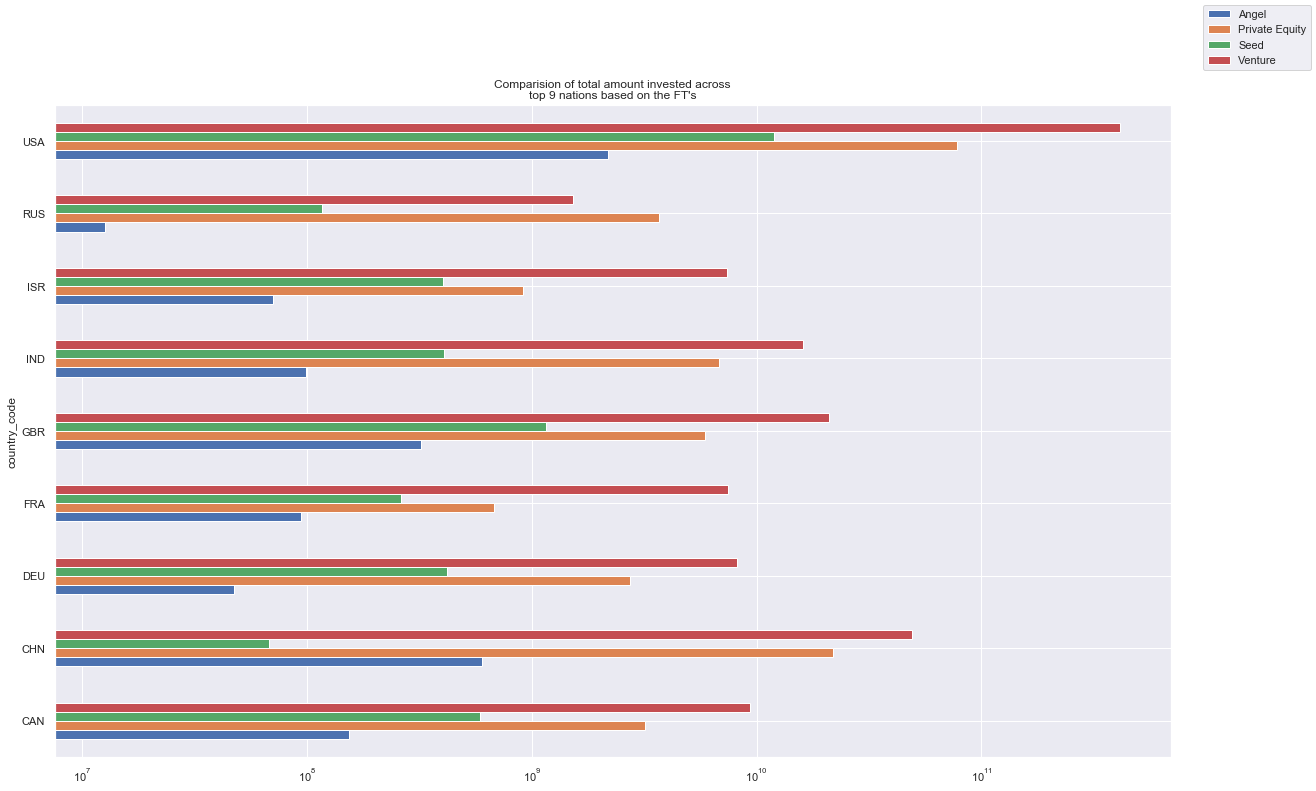

In [78]:
'''
Task: A plot showing the top 9 countries against the total amount 
of investments of funding type FT. This should make the top 3 
countries (Country 1, Country 2, and Country 3) very clear.
'''

# again, lets start by creating a filtered dataframe
filtered_data = master_frame.loc[
    (master_frame['funding_round_type'] == 'angel') |
    (master_frame['funding_round_type'] == 'private_equity') |
    (master_frame['funding_round_type'] == 'seed') |
    (master_frame['funding_round_type'] == 'venture')
]

filtrd_group = filtered_data.groupby([
    'country_code',
    'funding_round_type'
]).agg('sum')

filtrd_group = filtrd_group['raised_amount_usd'].groupby(
    level = 0, 
    group_keys = False
).apply(
    lambda x: x.sort_values(ascending = False).head(9)
).reset_index()

top9_countries = list(top9.reset_index()['country_code'])

filtrd_group = filtrd_group.loc[filtrd_group['country_code'].isin(top9_countries)]

plot2 = filtrd_group.groupby([
    'country_code', 'funding_round_type'
]).agg(
    'sum'
).unstack().plot(
    kind = 'barh', 
    figsize = (20,12),
    logx = True,
    legend = False,
    title = 'Comparision of total amount invested across\n'+
    'top 9 nations based on the FT\'s'
).get_figure()

plot2.legend([
    'Angel', 'Private Equity', 'Seed', 'Venture'
])

plot2.savefig('ft_in_top9.jpg')

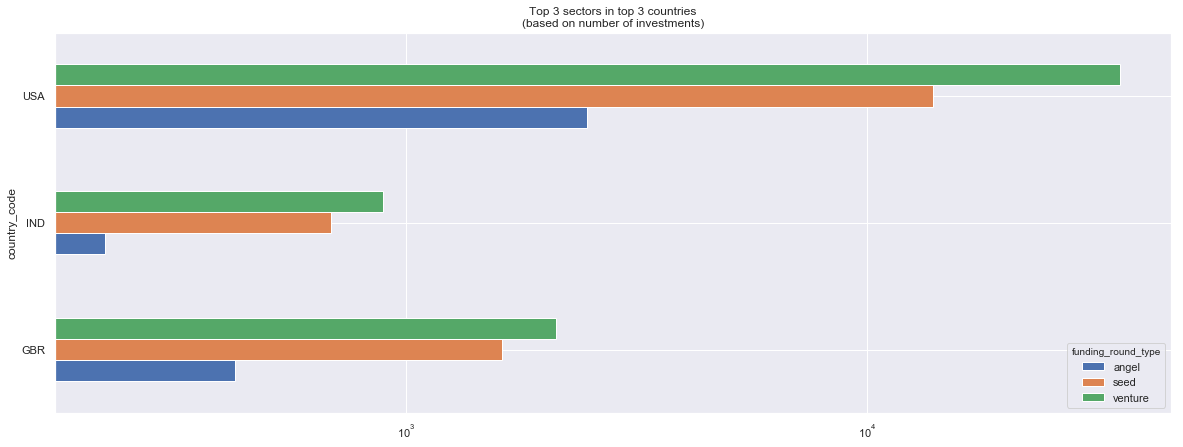

In [134]:
'''
task: A plot showing the number of investments in 
the top 3 sectors of the top 3 countries on one 
chart (for the chosen investment type FT).
'''

# since we are required to find top 3 candidates
# where English is an official language, we can 
# manually take USA, GBR, and IND

top3 = ['USA', 'GBR', 'IND']

# also, the top 3 sectors will be selected from
# the four FT's that we are interested in, not all 8.

filtrd_group = filtered_data.groupby([
    'funding_round_type',
    'country_code'
])['company_permalink'].agg('count').reset_index()

filtrd_group = filtrd_group.loc[
    filtrd_group['country_code'].isin(top3)
]

filtrd_group = filtrd_group.groupby([
    'country_code',
    'funding_round_type'
])['company_permalink'].agg('sum')

filtrd_group = filtrd_group.groupby(
    level = 0, 
    group_keys = False
).apply(
    lambda x: x.sort_values(ascending = False).head(3)
).unstack()

plot3 = filtrd_group.plot(
    kind = 'barh',
    logx = True,
    figsize = (20, 7),
    title = 'Top 3 sectors in top 3 countries\n'+
    '(based on number of investments)'
).get_figure()

plot3.savefig('top3_in_top3.jpg')